In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as TF
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from tensorflow import keras

In [2]:
diabetes_df = pd.read_table("diabetes.csv", header = 0, delimiter = ',')
columns_to_normalize = ['Glucose', 'BloodPressure','SkinThickness', 'Insulin']
diabetes_df[columns_to_normalize]=diabetes_df[columns_to_normalize].apply(lambda x: (x-min(x))/(max(x)-min(x)))

In [25]:
sums = diabetes_df['Outcome'].sum()
print(sums)

268


In [26]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.607510,0.566438,0.207439,0.094326,31.992578,0.471876,33.240885,0.348958
std,3.369578,0.160666,0.158654,0.161134,0.136222,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,0.497487,0.508197,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,0.587940,0.590164,0.232323,0.036052,32.000000,0.372500,29.000000,0.000000
75%,6.000000,0.704774,0.655738,0.323232,0.150414,36.600000,0.626250,41.000000,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
#opis cech


sums = diabetes_df[diabetes_df['Pregnancies']==17].count()
print(sums)

Pregnancies                 1
Glucose                     1
BloodPressure               1
SkinThickness               1
Insulin                     1
BMI                         1
DiabetesPedigreeFunction    1
Age                         1
Outcome                     1
dtype: int64


<Axes: >

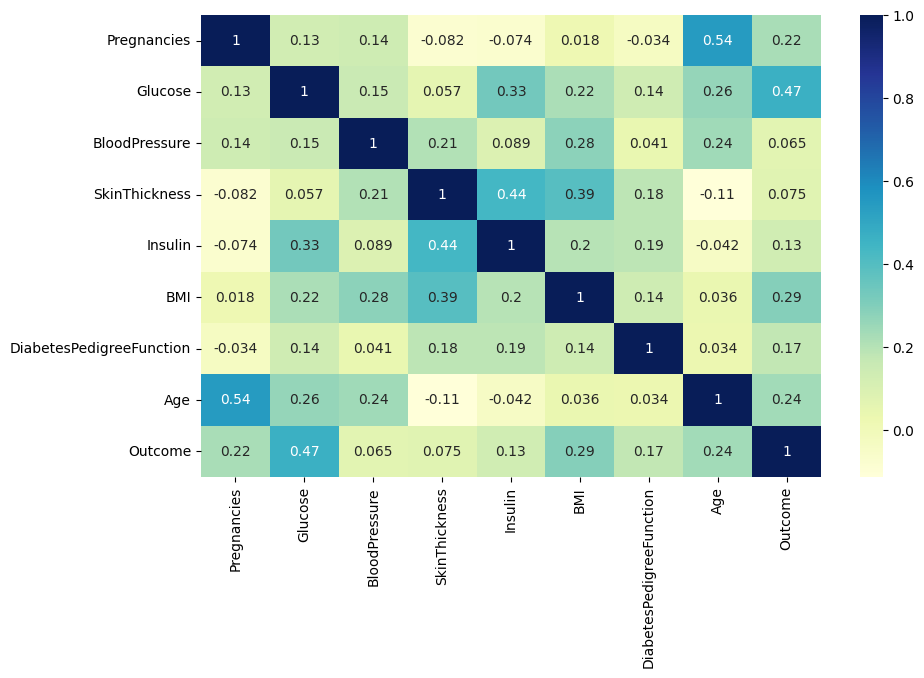

In [32]:
corr = diabetes_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap = "YlGnBu", annot = True)

Text(0.5, 1.0, 'Distribution of Age')

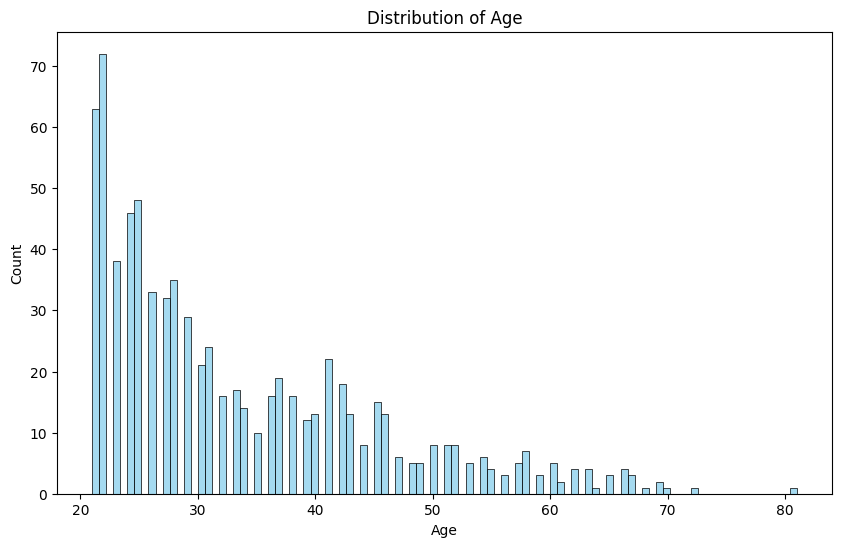

In [47]:
plt.figure(figsize = (10,6))
sns.histplot(diabetes_df['Age'], bins = 100, color = 'skyblue')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Glucose vs Outcome')

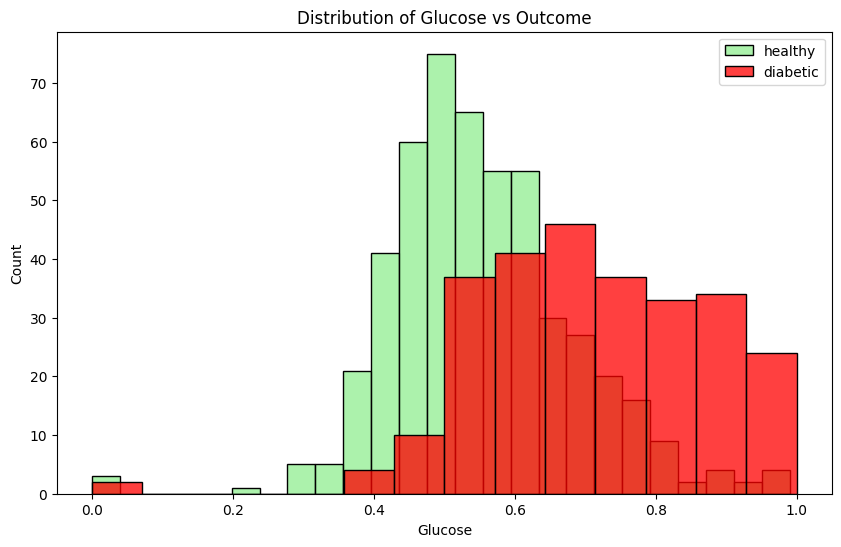

In [52]:
plt.figure(figsize = (10,6))
filtered_data_0 = diabetes_df[diabetes_df['Outcome']==0]
filtered_data_1 = diabetes_df[diabetes_df['Outcome']==1]
sns.histplot(filtered_data_0['Glucose'], color = 'lightgreen', label = 'healthy')
sns.histplot(filtered_data_1['Glucose'], color = 'red', label = 'diabetic')
plt.legend()
plt.title('Distribution of Glucose vs Outcome')

Text(0.5, 1.0, 'Distribution of BMI vs Outcome')

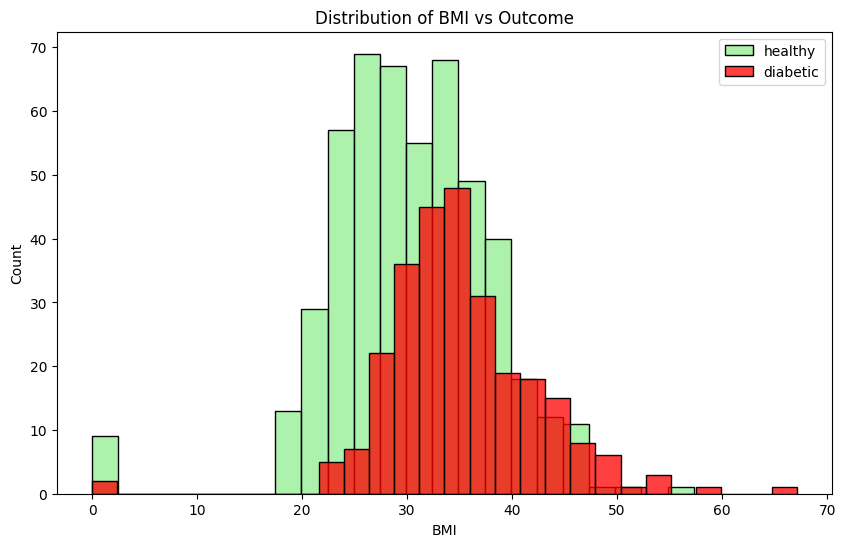

In [51]:
plt.figure(figsize = (10,6))
sns.histplot(filtered_data_0['BMI'], color = 'lightgreen', label= 'healthy')
sns.histplot(filtered_data_1['BMI'], color = 'red', label = 'diabetic')
plt.legend()
plt.title('Distribution of BMI vs Outcome')

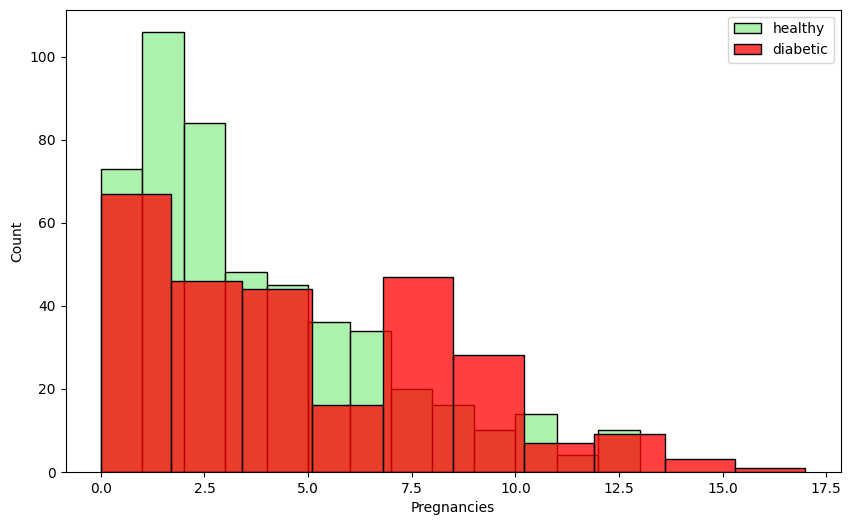

In [37]:
plt.figure(figsize = (10,6))
filtered_data_0 = diabetes_df[diabetes_df['Outcome']==0]
filtered_data_1 = diabetes_df[diabetes_df['Outcome']==1]
sns.histplot(filtered_data_0['Pregnancies'], color ='lightgreen', label = 'healthy')
sns.histplot(filtered_data_1['Pregnancies'], color = 'red', label = 'diabetic' )
plt.legend()
plt.title('Distribution of Pregnancies vs Outcome')

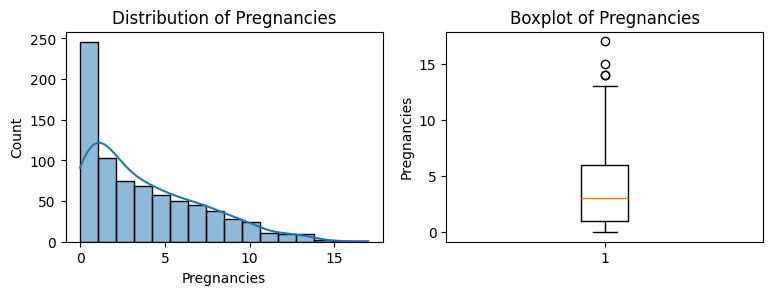

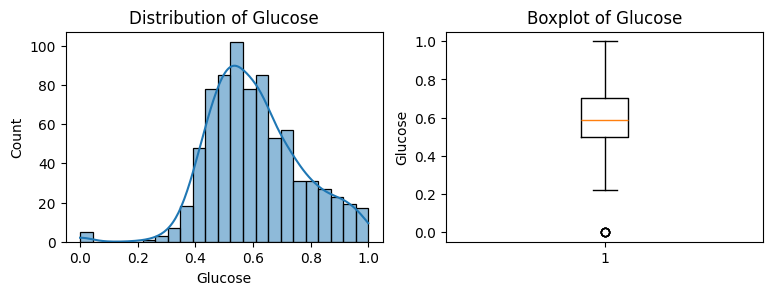

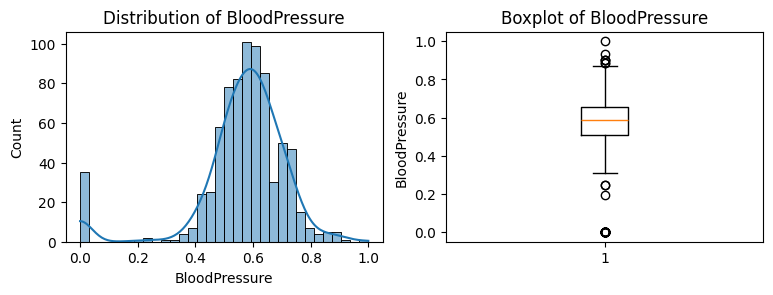

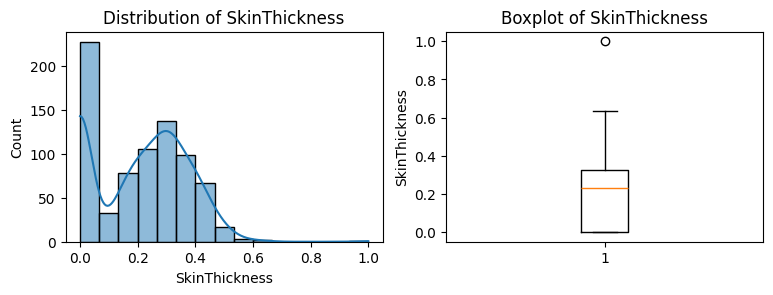

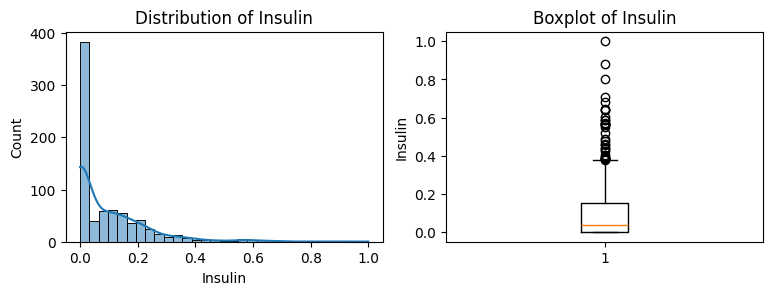

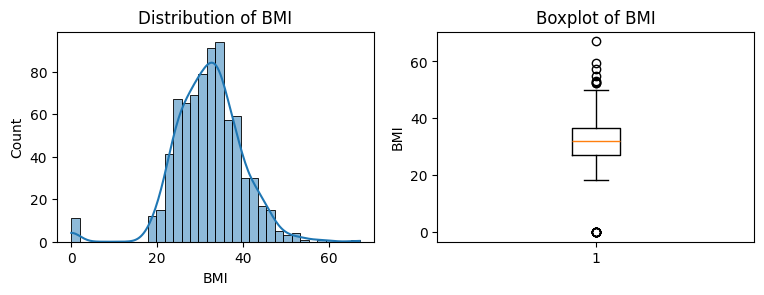

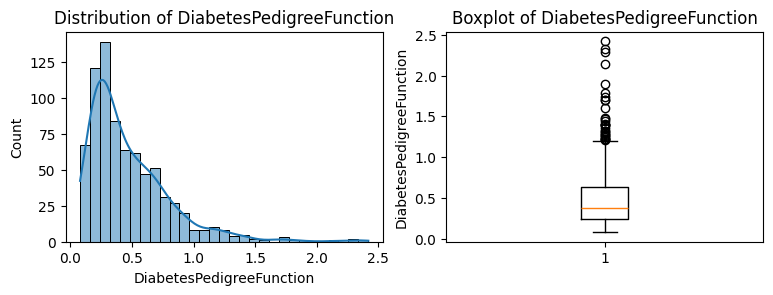

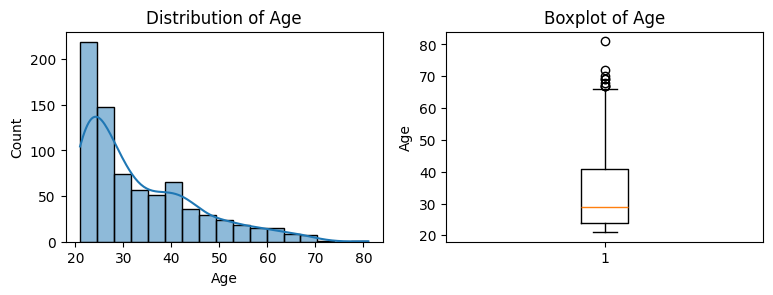

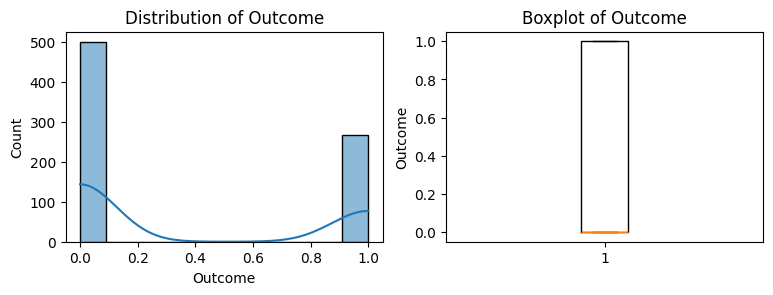

In [6]:
for column in diabetes_df.columns:
    if diabetes_df[column].dtype != object:
        plt.figure(figsize =(9,6))
        plt.subplot(2,2,1)
        sns.histplot(data = diabetes_df, x = column, kde = True)
        plt.title(f'Distribution of {column}')
        plt.subplot(2,2,2)
        plt.boxplot(data = diabetes_df, x = column)
        plt.ylabel(column)
        plt.title(f'Boxplot of {column}')

In [7]:
#METODA TSNE
tsne = TSNE(n_components = 2)
diabetes_df_2d = tsne.fit_transform(diabetes_df)
diabetes_df_2d_tsne = pd.DataFrame(data = diabetes_df_2d, columns = ["tsne_0","tsne_1"])
diabetes_df_2d_tsne

,tsne_0,tsne_1
0,33.677307,2.594467
1,-3.974109,-8.757857
2,3.333429,-12.016524
3,-27.617647,-7.075590
4,-3.880399,23.545422
...,...,...
763,41.237965,-0.325312
764,-8.590101,13.302994
765,-0.715494,-10.844420
766,28.273661,0.498995


<Axes: xlabel='tsne_0', ylabel='tsne_1'>

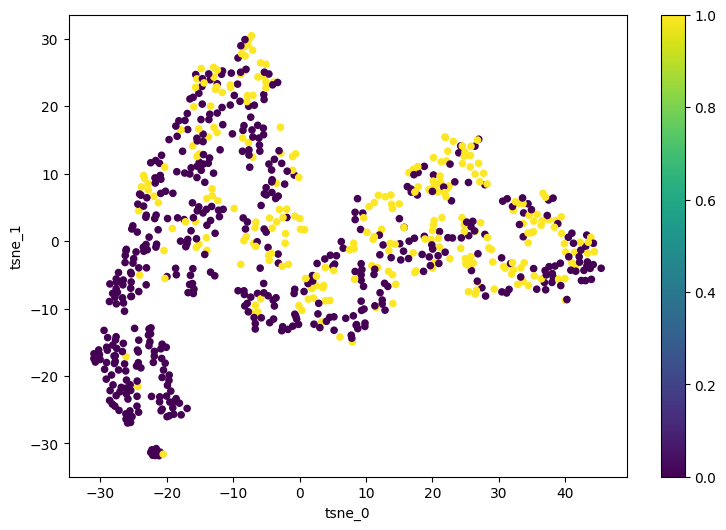

In [27]:
colors=diabetes_df['Outcome']
diabetes_df_2d_tsne.plot.scatter(x = 'tsne_0', y = 'tsne_1', c = colors,
                                cmap = 'viridis',figsize = (9,6), colorbar = True)

In [37]:
#Metoda PCA

pca = PCA(n_components = 2)
diabetes_2d_df_p = pca.fit_transform(diabetes_df)
diabetes_2d_df_pca = pd.DataFrame(data = diabetes_2d_df_p, columns = ['pca_0', 'pca_1'])
diabetes_2d_df_pca


,pca_0,pca_1
0,16.945357,0.897646
1,-2.906263,-5.275407
2,-0.908444,-8.654666
3,-12.699058,-3.358679
4,-0.383141,11.159687
...,...,...
763,30.369173,-0.399366
764,-6.250830,5.073044
765,-3.256671,-5.666546
766,13.024386,-2.435631


<Axes: xlabel='pca_0', ylabel='pca_1'>

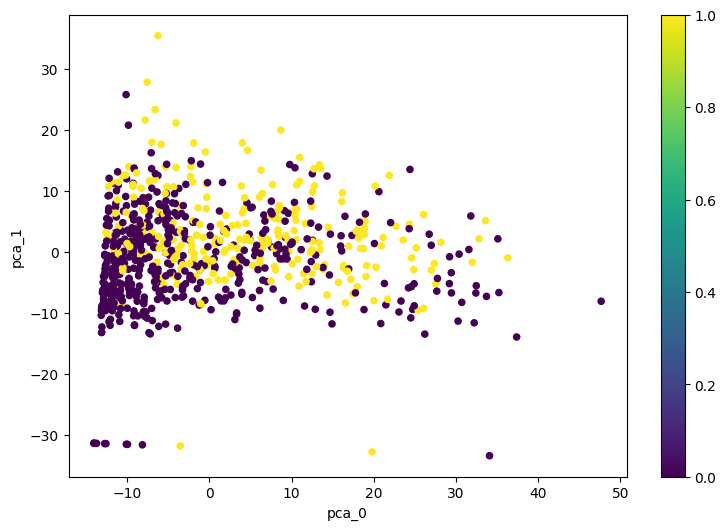

In [40]:
diabetes_2d_df_pca.plot.scatter(x = 'pca_0', y = 'pca_1', c = colors,
                               cmap = 'viridis',figsize = (9,6), colorbar = True)

<Axes: >

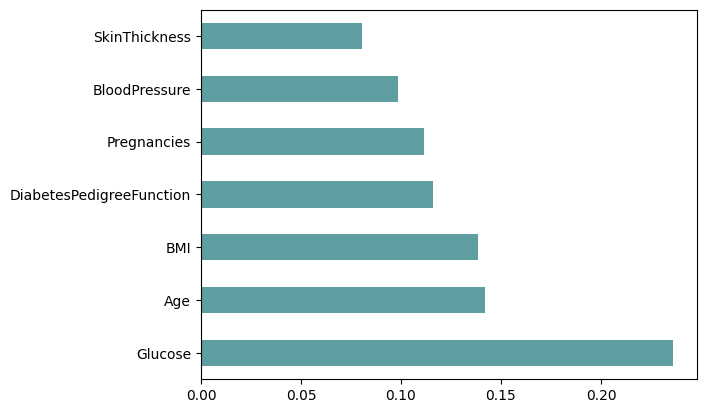

In [16]:
y = diabetes_df["Outcome"]
x = diabetes_df.drop(columns = "Outcome")

model = ExtraTreesClassifier()
model.fit(x,y)

importances = pd.Series(model.feature_importances_, index = x.columns)
importances.nlargest(7).plot(kind = "barh", color = "cadetblue")

In [4]:
#Algorytm knn 
y = diabetes_df['Outcome']
X = diabetes_df.drop(columns = 'Outcome')

knn = KNeighborsClassifier(n_neighbors = 23)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)



In [61]:
#sprawdzenie jaka ilosc sasiadow jest najbardziej optymalna


param_grid = {'n_neighbors': np.arange(1, 50)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'n_neighbors': 23}

In [8]:
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred)

print(c_matrix)
print(classification_report(y_test,y_pred))

[[79 17]
 [32 26]]
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        96
           1       0.60      0.45      0.51        58

    accuracy                           0.68       154
   macro avg       0.66      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154



In [57]:
y = diabetes_df['Outcome']
X = diabetes_df.drop(columns = 'Outcome')

knn_pca =  KNeighborsClassifier(n_neighbors = 46)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)

pca = PCA(n_components = 2)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

knn_pca.fit(x_train_pca, y_train)

y_pred_pca = knn_pca.predict(x_test_pca)

print(classification_report(y_test, y_pred_pca))
# sprawdzanie najlepszych parametrow

param_grid = {'n_neighbors': np.arange(1,50)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='precision')

grid_search.fit(x_train, y_train)
grid_search.best_params_


              precision    recall  f1-score   support

           0       0.67      0.85      0.75        96
           1       0.55      0.29      0.38        58

    accuracy                           0.64       154
   macro avg       0.61      0.57      0.57       154
weighted avg       0.62      0.64      0.61       154



{'n_neighbors': 14}

In [62]:
y = diabetes_df['Outcome']
X = diabetes_df.drop(columns = 'Outcome')

knn_tsne =  KNeighborsClassifier(n_neighbors = 14)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)

X_combined = np.vstack((x_train, x_test))

tsne = TSNE(n_components = 2)
X_combined_tsne = tsne.fit_transform(X_combined)

x_train_tsne = X_combined[:len(x_train)]
x_test_tsne = X_combined[len(x_train):]

knn_tsne.fit(x_train_tsne, y_train)

y_pred_tsne = knn_tsne.predict(x_test_tsne)
print(classification_report(y_test, y_pred_tsne))

# sprawdzanie najlepszych parametrow

param_grid = {'n_neighbors': np.arange(1,50)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='precision')

grid_search.fit(x_train, y_train)
grid_search.best_params_

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        96
           1       0.70      0.45      0.55        58

    accuracy                           0.72       154
   macro avg       0.71      0.67      0.67       154
weighted avg       0.72      0.72      0.70       154



{'n_neighbors': 14}

In [17]:
#REGRESJA LOGISTYCZNA

y = diabetes_df['Outcome']
x = diabetes_df.drop(columns = 'Outcome')
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)
lr = LogisticRegression(penalty = None, max_iter = 10000)

lr.fit(x_train, y_train)
scores = cross_validate(lr, X, y, cv = 5, return_train_score = True,
                         scoring = ('accuracy','f1', 'precision', 'recall'))

y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))
scores

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        96
           1       0.82      0.62      0.71        58

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.80       154



{'fit_time': array([0.03125215, 0.04656029, 0.03127193, 0.03125215, 0.03130054]),
 'score_time': array([0.01562595, 0.        , 0.        , 0.        , 0.01562619]),
 'test_accuracy': array([0.77272727, 0.74675325, 0.75324675, 0.81699346, 0.76470588]),
 'train_accuracy': array([0.77687296, 0.77850163, 0.78501629, 0.77073171, 0.78861789]),
 'test_f1': array([0.64646465, 0.62857143, 0.58695652, 0.70833333, 0.60869565]),
 'train_f1': array([0.63852243, 0.64583333, 0.65625   , 0.63185379, 0.66321244]),
 'test_precision': array([0.71111111, 0.64705882, 0.71052632, 0.79069767, 0.71794872]),
 'train_precision': array([0.73333333, 0.72941176, 0.74117647, 0.7202381 , 0.74853801]),
 'test_recall': array([0.59259259, 0.61111111, 0.5       , 0.64150943, 0.52830189]),
 'train_recall': array([0.56542056, 0.57943925, 0.58878505, 0.5627907 , 0.59534884])}

In [5]:
# Wykorzystanie pca dla regresji logistycznej


y = diabetes_df["Outcome"]
X = diabetes_df.drop(columns = "Outcome")

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)

pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

lr = LogisticRegression(penalty = 'l2', max_iter = 100, C= 0.001)
lr.fit(x_train_pca, y_train)
y_pred = lr.predict(x_test_pca)
report_pca = classification_report(y_test, y_pred)

print('Classification Report:\n', report_pca)

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.88      0.75        96
           1       0.56      0.26      0.35        58

    accuracy                           0.64       154
   macro avg       0.61      0.57      0.55       154
weighted avg       0.62      0.64      0.60       154



In [15]:
# wykorzystanie TSNE dla regresji logisytycznej
y = diabetes_df["Outcome"]
X = diabetes_df.drop(columns = "Outcome")

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)

tsne = TSNE(n_components = 2)
X_combined = np.vstack((x_train, x_test))
X_combined_tsne = tsne.fit_transform(X_combined)

x_train_tsne = X_combined_tsne[:len(x_train)]
x_test_tsne = X_combined_tsne[len(x_train):]

lr = LogisticRegression(penalty = None, max_iter = 10000)
lr.fit(x_train_tsne, y_train)

y_pred = lr.predict(x_test_tsne)
report_tsn = classification_report(y_test, y_pred)

print('Classification Report:\n', report_tsn)

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.84      0.74        96
           1       0.52      0.28      0.36        58

    accuracy                           0.63       154
   macro avg       0.59      0.56      0.55       154
weighted avg       0.60      0.63      0.60       154



In [19]:
y = diabetes_df["Outcome"]
X = diabetes_df.drop(columns = "Outcome")

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)
model_svm = SVC(kernel = 'rbf', C = 1.0,gamma = 'scale')

model_svm.fit(x_train, y_train)

y_pred = model_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
raport = classification_report(y_test, y_pred)


print("Classification Report:\n", raport)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.94      0.78        96
           1       0.68      0.22      0.34        58

    accuracy                           0.67       154
   macro avg       0.68      0.58      0.56       154
weighted avg       0.67      0.67      0.61       154



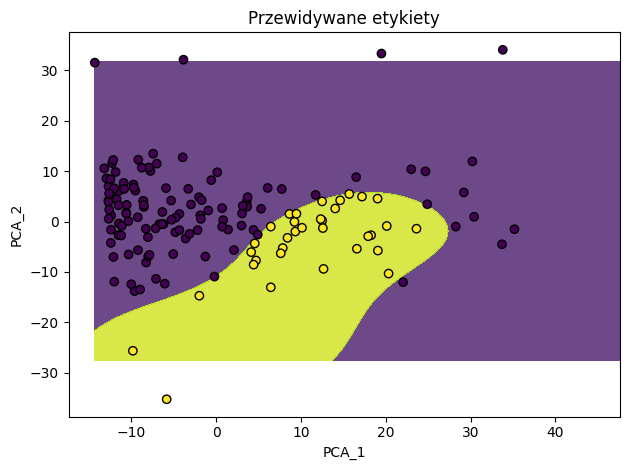

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78        96
           1       0.65      0.38      0.48        58

    accuracy                           0.69       154
   macro avg       0.67      0.63      0.63       154
weighted avg       0.68      0.69      0.66       154



In [22]:
# ZASTOSOWANIE PCA DLA SVM 

y = diabetes_df["Outcome"]
X = diabetes_df.drop(columns = "Outcome")
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)

pca = PCA(n_components = 2)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

model_svm_pca = SVC(kernel = 'rbf', C= 1.0, gamma = 'scale')
model_svm_pca.fit(x_train_pca, y_train)

y_pred_pca = model_svm_pca.predict(x_test_pca)

raport = classification_report(y_test, y_pred_pca)


h = .02
x_min, x_max = x_train_pca[:, 0].min(), x_train_pca[:, 0].max()
y_min, y_max = x_train_pca[:, 1].min() , x_train_pca[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model_svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_pred_pca, edgecolor='k', marker='o', cmap='viridis')
plt.title("Przewidywane etykiety")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")

plt.tight_layout()
plt.show()


print("Classification Report:\n", raport)

In [49]:
#SIECI NEURONOWE

y = diabetes_df['Outcome']
X = diabetes_df.drop(columns='Outcome')

#podział danych na zbiór treningowy (80%) i tymczasowy (20%).
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 123)
#podział danych na testowy (10%) i walidacyjny (10%).
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 123)

model = keras.Sequential([
    
    keras.layers.Dense(64, activation = 'tanh'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])


In [50]:
model.compile(optimizer = 'adam',
              loss = TF.losses.BinaryCrossentropy(),
              metrics = [TF.metrics.BinaryAccuracy(), TF.metrics.MeanAbsoluteError()])

In [51]:
history = model.fit(X, y, epochs=100, validation_data = (X_val, y_val))


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.3870 - loss: 0.8420 - mean_absolute_error: 0.5367 - val_binary_accuracy: 0.6494 - val_loss: 0.6518 - val_mean_absolute_error: 0.4303
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.6398 - loss: 0.6665 - mean_absolute_error: 0.4443 - val_binary_accuracy: 0.7013 - val_loss: 0.6204 - val_mean_absolute_error: 0.4348
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.6477 - loss: 0.6329 - mean_absolute_error: 0.4466 - val_binary_accuracy: 0.7403 - val_loss: 0.5989 - val_mean_absolute_error: 0.4218
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.6607 - loss: 0.6254 - mean_absolute_error: 0.4356 - val_binary_accuracy: 0.7143 - val_loss: 0.5814 - val_mean_absolute_error: 0.4132
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.6352 - loss: 0.6252 - mean_absolute_error: 0.4404 - val_binary_accuracy: 0.6883 - val_loss: 0.5749 - val_me

In [52]:
results =model.fit(X, y, epochs = 400)
print(results)

Epoch 1/400
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7721 - loss: 0.4588 - mean_absolute_error: 0.3274 
Epoch 2/400
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7744 - loss: 0.4666 - mean_absolute_error: 0.3293 
Epoch 3/400
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7526 - loss: 0.4746 - mean_absolute_error: 0.3293 
Epoch 4/400
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7991 - loss: 0.4361 - mean_absolute_error: 0.3088 
Epoch 5/400
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7798 - loss: 0.4537 - mean_absolute_error: 0.3092 
Epoch 6/400
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7645 - loss: 0.4861 - mean_absolute_error: 0.3403 
Epoch 7/400
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7421 - loss: 0.4974 - mean_absolute_error: 0.3401 
Epoch 8/400
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7616 - loss: 0.4746 - mean_absolute_error: 0.3297 
Epoch 9/400
24/2

In [53]:
results = model.evaluate(X_test, y_test)
print(results)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8648 - loss: 0.3571 - mean_absolute_error: 0.2574 
[0.3562055230140686, 0.8701298832893372, 0.25187045335769653]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8069 - loss: 0.4207 - mean_absolute_error: 0.2793 
[0.39986884593963623, 0.8159608840942383, 0.2659876346588135]


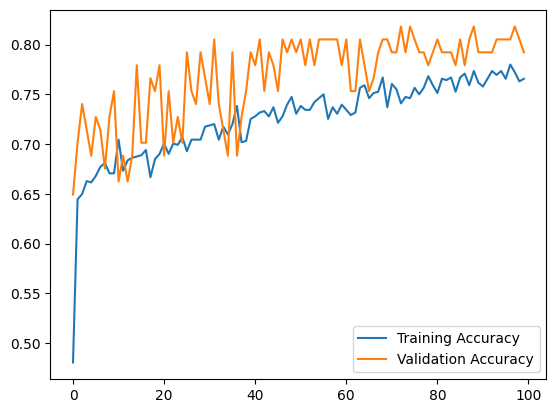

In [54]:
results = model.evaluate(X_train, y_train)
print(results)
plt.plot(history.history['binary_accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

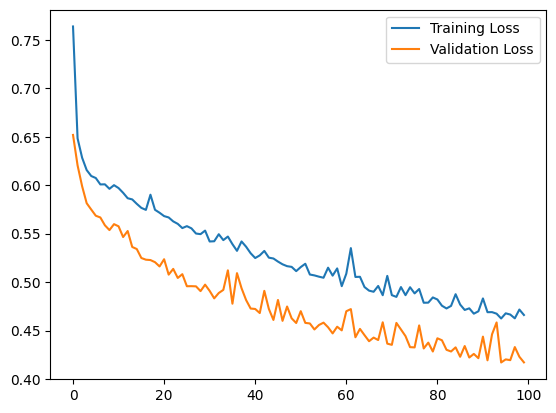

In [55]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()